# Task 6.5 - Supervised Machine Learning

This notebook contains steps to prepare for Clustering using kMeans algorithm, and includes:
1. Importing clean data and subsetting to remove categorical variables
2. Running the Elbow technique
3. Running the kMeans algorithm
4. Creating visualizations
5. Interpretations
6. Exporting data with merged cluster information

## Task Step 1 - Install and Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# Display graphs without needing to print
%matplotlib inline

## Task Step 2 - Import data & conduct data cleaning

In [3]:
# Define path
path = 'C:/Users/kaymi/OneDrive/Desktop/Career Foundry/Data Immersion/Achievement 6 - Advanced Data Analytics'

In [4]:
# Import prepared data (vacation rentals under $1,000 per nights)
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'vacation_listings_subset.csv'))

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,price_category,booking_requirement,popularity
0,0,0,13188,Rental unit in Vancouver · ★4.83 · Studio · 2 ...,51466,Family Guns,Riley Park,49.24773,-123.10509,Entire home/apt,...,260,2023-06-01,1.61,2,150,4,Vacation Rental,mid-price,less than 1 week,booked half year
1,1,1,13358,Condo in Vancouver · ★4.68 · 1 bedroom · 1 bed...,52116,Lynn,West End,49.28201,-123.12669,Entire home/apt,...,454,2023-05-22,2.88,1,247,19,Vacation Rental,mid-price,less than 1 week,available half year
2,2,2,13490,Rental unit in Vancouver · ★4.92 · 1 bedroom ·...,52467,Iris,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,...,98,2023-05-01,0.67,1,121,5,Vacation Rental,mid-price,over 3 weeks,booked half year
3,3,3,14267,Home in Vancouver · ★4.76 · 1 bedroom · 2 beds...,56030,Peter & Alison,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,...,34,2021-07-14,0.22,1,0,0,Vacation Rental,mid-price,less than 1 week,popular
4,4,4,14424,Guest suite in Vancouver · ★4.69 · 1 bedroom ·...,56709,Samantha Jo,Downtown Eastside,49.27921,-123.08835,Entire home/apt,...,266,2023-05-25,1.64,4,187,7,Vacation Rental,low price,over 3 weeks,available half year


In [6]:
# Remove "Unnamed" columns
df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])

In [7]:
df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rental_type,price_category,booking_requirement,popularity
0,13188,Rental unit in Vancouver · ★4.83 · Studio · 2 ...,51466,Family Guns,Riley Park,49.24773,-123.10509,Entire home/apt,150,3,260,2023-06-01,1.61,2,150,4,Vacation Rental,mid-price,less than 1 week,booked half year
1,13358,Condo in Vancouver · ★4.68 · 1 bedroom · 1 bed...,52116,Lynn,West End,49.28201,-123.12669,Entire home/apt,227,1,454,2023-05-22,2.88,1,247,19,Vacation Rental,mid-price,less than 1 week,available half year
2,13490,Rental unit in Vancouver · ★4.92 · 1 bedroom ·...,52467,Iris,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,98,2023-05-01,0.67,1,121,5,Vacation Rental,mid-price,over 3 weeks,booked half year
3,14267,Home in Vancouver · ★4.76 · 1 bedroom · 2 beds...,56030,Peter & Alison,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.22,1,0,0,Vacation Rental,mid-price,less than 1 week,popular
4,14424,Guest suite in Vancouver · ★4.69 · 1 bedroom ·...,56709,Samantha Jo,Downtown Eastside,49.27921,-123.08835,Entire home/apt,134,30,266,2023-05-25,1.64,4,187,7,Vacation Rental,low price,over 3 weeks,available half year


In [8]:
df.shape

(5929, 20)

In [9]:
# Create subset to remove categorical data
df_sub = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]

In [10]:
df_sub.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,49.24773,-123.10509,150,3,260,1.61,2,150,4
1,49.28201,-123.12669,227,1,454,2.88,1,247,19
2,49.25622,-123.06607,150,30,98,0.67,1,121,5
3,49.24922,-123.08139,150,3,34,0.22,1,0,0
4,49.27921,-123.08835,134,30,266,1.64,4,187,7


## Task Step 3 - Elbow technique

In [11]:
# Check for missing values
df_sub.isnull().sum()

latitude                            0
longitude                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                 937
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
dtype: int64

In [12]:
# Update missing values to zeros in reviews_per_month column
df_sub['reviews_per_month'] = df_sub['reviews_per_month'].fillna(0)

C:\Users\kaymi\AppData\Local\Temp\ipykernel_26592\813138099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['reviews_per_month'] = df_sub['reviews_per_month'].fillna(0)


In [13]:
# Check for missing values
df_sub.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [14]:
# Define range of potential clusters
num_cl = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [15]:
# Create score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))]

C:\Users\kaymi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaymi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaymi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaymi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaymi\anaconda3\lib\site-packages\sklearn\clust

In [16]:
score

[-240979880.18145257,
 -161616758.57397145,
 -106527551.55499072,
 -87905999.88304247,
 -71991120.52574517,
 -62209147.783773266,
 -54442599.35929671,
 -48738633.60106404,
 -44835954.7256191]

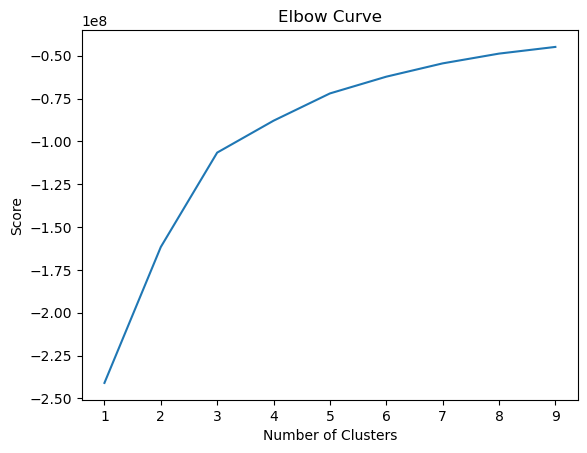

In [17]:
# Plot elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Task Step 4 - Number of clusters

It looks like the line begins to straighten out/increase at a lesser degree after 3 clusters, so I will use 3 clusters for the purpose of this analysis. 

## Task Step 5 - k-means algorithm

In [18]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3)

In [19]:
# Fit the k-means object to the data
kmeans.fit(df_sub)

C:\Users\kaymi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

## Task Step 6 - Attach new column with resulting clusters

In [20]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\kaymi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kaymi\AppData\Local\Temp\ipykernel_26592\4169945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [21]:
df_sub.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,clusters
0,49.24773,-123.10509,150,3,260,1.61,2,150,4,0
1,49.28201,-123.12669,227,1,454,2.88,1,247,19,2
2,49.25622,-123.06607,150,30,98,0.67,1,121,5,0
3,49.24922,-123.08139,150,3,34,0.22,1,0,0,0
4,49.27921,-123.08835,134,30,266,1.64,4,187,7,2


In [22]:
df_sub['clusters'].value_counts()

0    3285
2    1780
1     864
Name: clusters, dtype: int64

## Task Step 7 & 8 - Visualizations & Insights

#### Cluster for "availability_365" and "price"

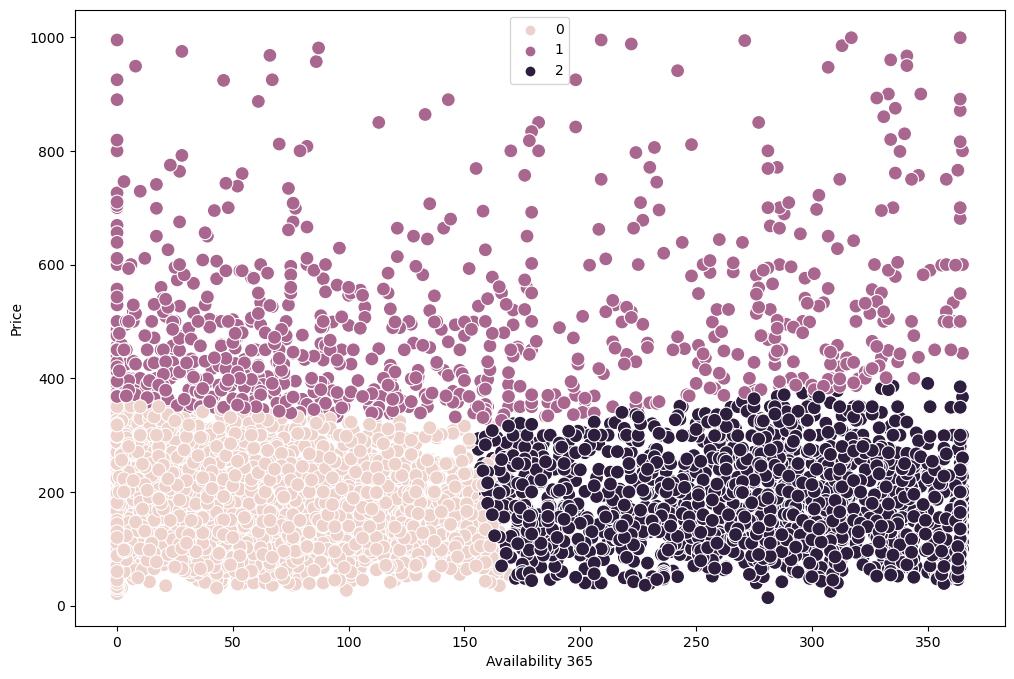

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['availability_365'], y=df_sub['price'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Availability 365')
plt.ylabel('Price')
plt.show()

The clusters shown here represent units with a price range of under approx. 375 that are available between 0 to approximately 175 days of the year, a cluster that represents units with a price range of under 400 that are available between approx. 175 days of the year to 365 days of the year, and a cluster of units that are above 400 that have much more variablity in their availability. The pink cluster is the most densely populated, showing that units under approx 375 dollars per night tend to be booked more regularly. It would be interesting to investigate the characteristics of units in the pink cluster vs the dark purple cluster, and these clusters have similar pricing characteristics, but the availability is different.

#### Cluster for "Availability_365" and "Minimum_Nights"

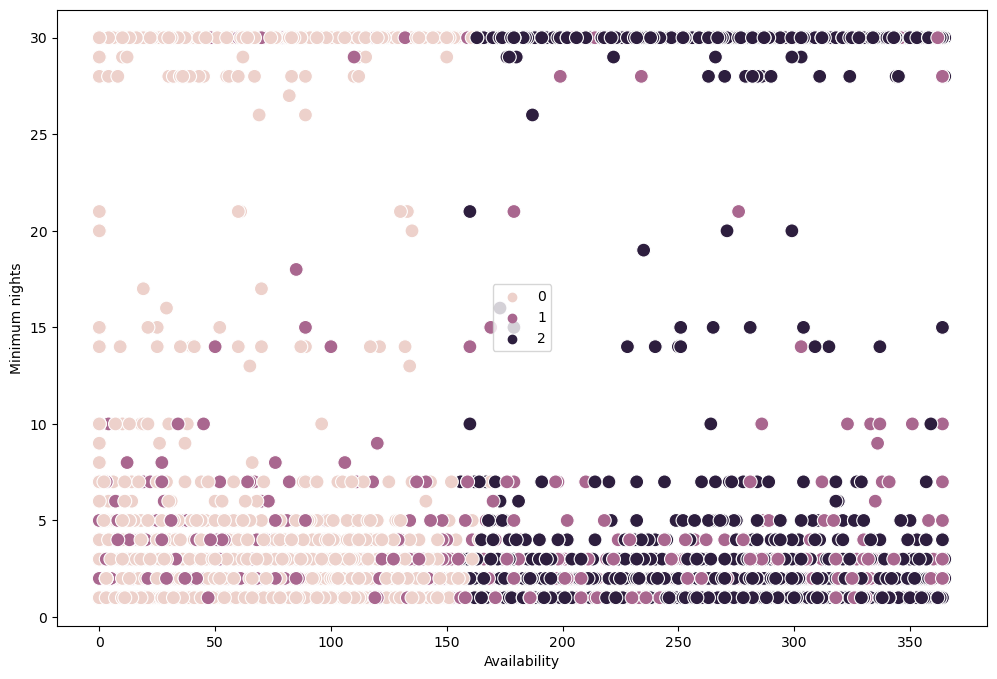

In [24]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['availability_365'], y=df_sub['minimum_nights'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Availability')
plt.ylabel('Minimum nights')
plt.show()

The clusters here are not quite as obvious as the other graph; we can see that the pink and dark purple clusters are still split along the bottom of the graph, and is seems that units with minimum night requirements under around 7 nights tend to be booked up more reguarly. Again, there are similarities between the pink and dark purple clusters in this respect, and I feel extra investigation may need to be done to determine what is the cause!

#### Cluster for "number_of_reviews_ltm" and "price"

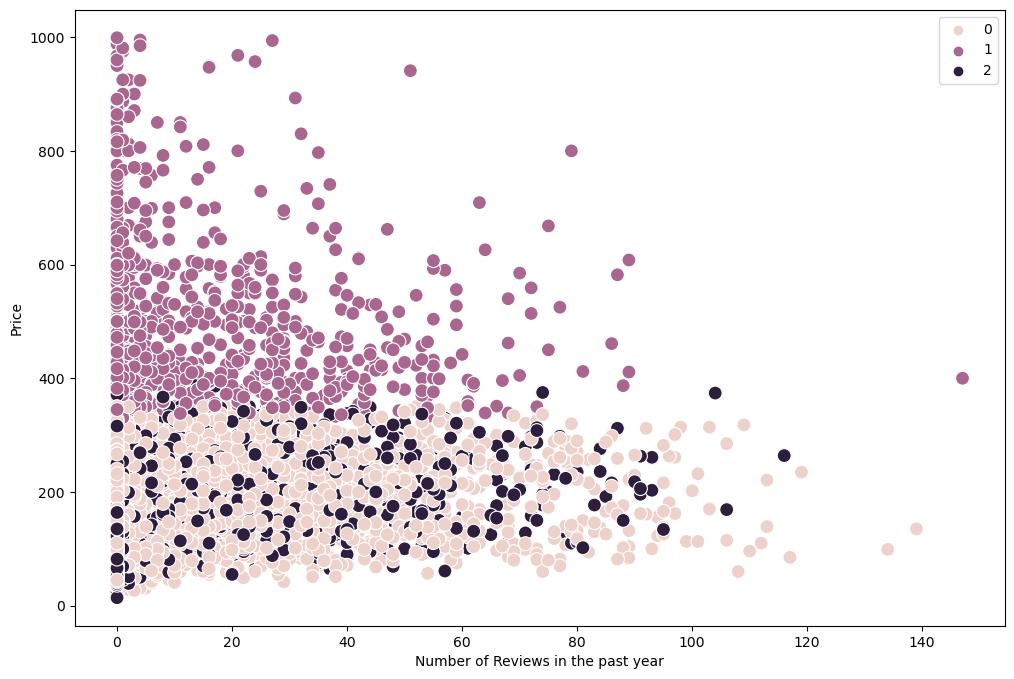

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['number_of_reviews_ltm'], y=df_sub['price'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Number of Reviews in the past year')
plt.ylabel('Price')
plt.show()

It's a bit hard to tell, but it seems that the purple cluster (or units with prices over 400 per night) have more values clustered around the "zero" number of reviews mark, while units with prices under 400 per night have a bit more variability. I would be interested in looking into the reviews of the one unit priced over 400 per night that has over 140 reviews just in the past year - would be interesting to see if they are good or bad reviews, or if this is perhaps an outlier.

## Task Step 9 - Groupby Function

In [26]:
# Groupby Function for Availability and Price
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\kaymi\AppData\Local\Temp\ipykernel_26592\2250107829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [27]:
df_sub.groupby('cluster').agg({'availability_365':['mean','median'], 'price':['mean','median'], 'minimum_nights':['mean','median'],'number_of_reviews_ltm':['mean','median'],'calculated_host_listings_count':['mean','median']})

availability_365              price        minimum_nights         \
                        mean median        mean median           mean median   
cluster                                                                        
dark purple       272.648315  280.0  180.768539  168.0      16.827528   30.0   
pink               51.751294   43.0  168.007306  156.0      10.400609    3.0   
purple            139.009259  113.0  496.383102  450.0       6.537037    3.0   

            number_of_reviews_ltm        calculated_host_listings_count         
                             mean median                           mean median  
cluster                                                                         
dark purple             11.384831    3.0                      10.033146    2.0  
pink                    15.223744    4.0                       3.963166    1.0  
purple                  14.609954    5.0                       5.527778    1.0

The pink cluster appears to have the best descriptive statistics in the sense that this group contains units with an average of 168 dollars per night, and is only available for an average of 52 days throughout the year. It also seems to get the most reviews in the last twelve months even though the average minimum night requirement is 10 nights. I had mentioned earlier I wanted to contrast this with the dark purple group that seemed to have similar pricing but had much higher availability. The dark purple group has an average availability of 277 nights per year, and interestingly has an average minimum night requirement of 17 nights, and the highest "calculated host listings count" of 10 units. I would be curious to know if perhaps a unit owner having more units leads to lower quality in the service they provide (having to manage 10 units instead of around 4 units, as is the pink cluster's average, may cause a lower attention to detail in the cleanliness, amenities, etc. of the rental). The dark purple cluster's higher average minimum night requirement may also play into the availability, as perhaps renters do not want to have to meet a 2 week minimum requirement to choose a rental. Interestingly, even the purple cluster with prices averaging 496 dollars per night are booked for an average of 139 nights per year, which is still better than the dark purple cluster. 

## Task Step 10 - Future Analytics

I don't think this information alone would be enough to draw conclusions on what affects a unit's availability/popularity, however it has opened up a few areas to explore further. I would particularly like to look further into the calculated_host_listings_count variable and determine the effect offering multiple properties has to a unit owner's overall reviews. This data set is unfortunately limited in some aspects, and I would also love to collect data on the average review rating of the listings as it may give more insight to this relationship. I would also like to compare these results with the qualitative characteristics in this data set to determine if there are relationships between the clusters and perhaps things like room type offered and neighbourhood location. All in all, using unsupervised machine learning helped to highlight different categories of units listed on Airbnb, and we can apply different algorithm methods to the information we uncovered here to further our analysis and possibly predict outcomes using supervised machine learning or classification algorithms.

In [28]:
# Export df_Sub
df_sub.to_csv(os.path.join(path, '02 Data','Prepared Data', 'cluster_analysis.csv'))

In [33]:
# Merge subset clusters with original dataframe for Tableau analysis
df_merge = df.merge(df_sub, on = ['latitude','longitude'])

In [34]:
df_merge.head()

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_x,minimum_nights_x,...,popularity,price_y,minimum_nights_y,number_of_reviews_y,reviews_per_month_y,calculated_host_listings_count_y,availability_365_y,number_of_reviews_ltm_y,clusters,cluster
0,13188,Rental unit in Vancouver · ★4.83 · Studio · 2 ...,51466,Family Guns,Riley Park,49.24773,-123.10509,Entire home/apt,150,3,...,booked half year,150,3,260,1.61,2,150,4,0,pink
1,13358,Condo in Vancouver · ★4.68 · 1 bedroom · 1 bed...,52116,Lynn,West End,49.28201,-123.12669,Entire home/apt,227,1,...,available half year,227,1,454,2.88,1,247,19,2,dark purple
2,13490,Rental unit in Vancouver · ★4.92 · 1 bedroom ·...,52467,Iris,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,...,booked half year,150,30,98,0.67,1,121,5,0,pink
3,14267,Home in Vancouver · ★4.76 · 1 bedroom · 2 beds...,56030,Peter & Alison,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,...,popular,150,3,34,0.22,1,0,0,0,pink
4,14424,Guest suite in Vancouver · ★4.69 · 1 bedroom ·...,56709,Samantha Jo,Downtown Eastside,49.27921,-123.08835,Entire home/apt,134,30,...,available half year,134,30,266,1.64,4,187,7,2,dark purple


In [35]:
# Export data 
df_merge.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cluster_analysis_full.csv'))